In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
db=mysql.connector.connect(host="localhost", username="root", password="123456", database="ecommerce")
cur=db.cursor()

# 1. List all unique cities where customers are located.

In [4]:
query="""SELECT distinct(customer_city) from customers"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["customer_city"])
df.head()

,customer_city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# 2. Count the number of orders placed in 2017.

In [5]:
query="""select year(order_purchase_timestamp) as Years,count(order_id) as 
Total_Orders from orders where year(order_purchase_timestamp)=2017 group by year(order_purchase_timestamp) ;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["year","Number of Orders "])
df

,year,Number of Orders
0,2017,45101


# 3. Find the total sales per category.

In [6]:
query="""select upper(products.product_category) as Category, round(sum(payments.payment_value),2)as Sales from products join order_items on 
products.product_id=order_items.product_id join payments on payments.order_id=order_items.order_id group by Category ;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["Category","Sales"])
df


,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# 4. Calculate the percentage of orders that were paid in installments.

In [7]:
query="""select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 as Percentage from payments;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["PERCENTAGE"])
df

,PERCENTAGE
0,99.9981


# 5. Count the number of customers from each state.

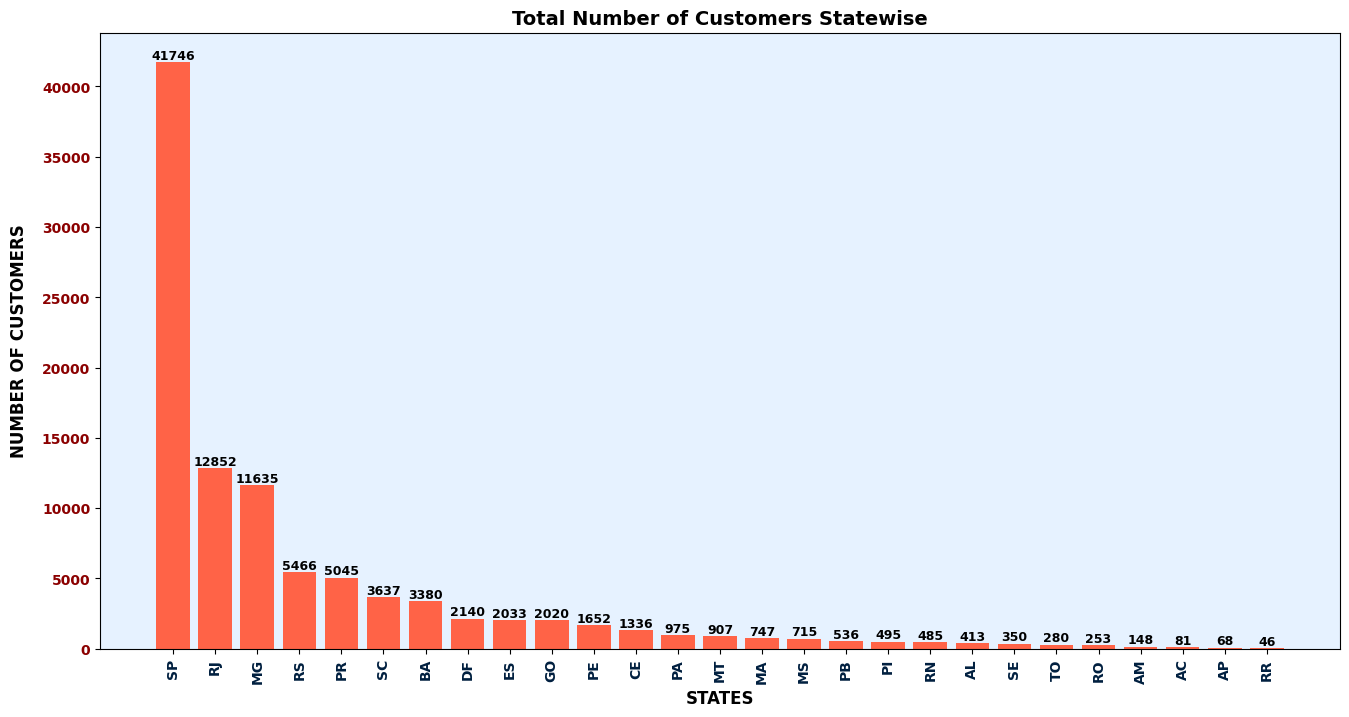

In [32]:
query="""select customer_state,count(customer_id) as 'Number of Customers'from customers group by customer_state;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["customer_state","Number of Customers"])
df=df.sort_values(by='Number of Customers',ascending=False)
plt.figure(figsize=(16,8))
plt.gca().set_facecolor('#E6F2FF')
plt.bar(df["customer_state"],df["Number of Customers"],color='#FF6347',width=0.8)
for index, value in enumerate(df["Number of Customers"]):
 plt.text(index, value, str(value), ha='center', va='bottom',fontweight='bold',fontsize=9)
plt.xlabel('STATES',fontsize=12,fontweight='bold',)
plt.ylabel('NUMBER OF CUSTOMERS',fontsize=12,fontweight='bold',labelpad=10)
plt.xticks(rotation=90,fontsize=10,fontweight='bold',color='#001f3f')
plt.yticks(fontsize=10,fontweight='bold',color='#8B0000')
plt.title('Total Number of Customers Statewise',fontsize=14,fontweight='bold',loc='center')
plt.show()

# 6.Calculate the number of orders per month in 2018.

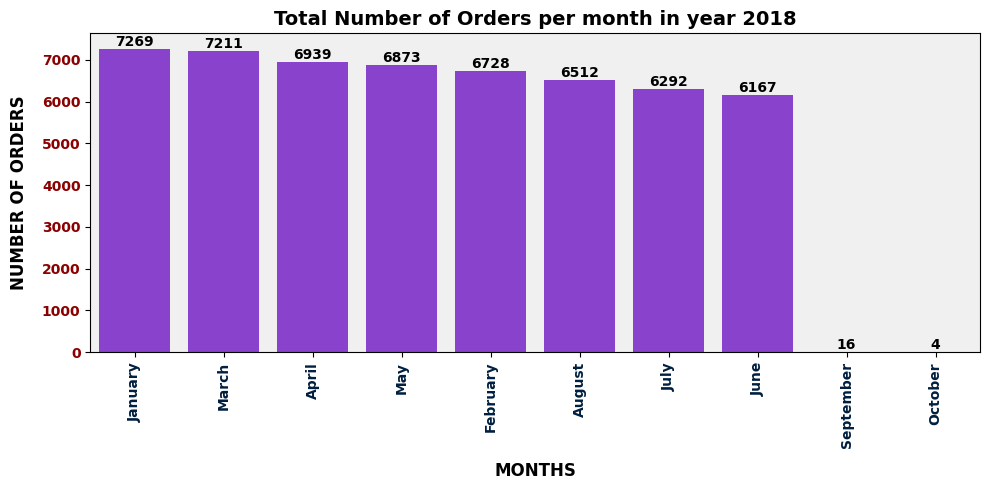

In [41]:
query="""select monthname(order_purchase_timestamp) as 'Month',count(order_id) as Number_of_Orders from orders 
where year(order_purchase_timestamp)=2018 group by monthname(order_purchase_timestamp);
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["Month","Number of Orders"])
df=df.sort_values(by='Number of Orders',ascending=False)
plt.figure(figsize=(10,5))
plt.gca().set_facecolor('#F0F0F0')
#plt.bar(df["Month"],df["Number of Orders"],color='green')
#for index, value in enumerate(df["Number of Orders"]):
 #plt.text(index, value, str(value), ha='center', va='bottom',fontweight='bold')
data_label=sns.barplot(data=df,x=df["Month"],y=df["Number of Orders"],color='#8A2BE2')
data_label.bar_label(data_label.containers[0],fontweight='bold')
plt.xlabel('MONTHS',fontsize=12,fontweight='bold',labelpad=10)
plt.ylabel('NUMBER OF ORDERS',fontsize=12,fontweight='bold',labelpad=10)
plt.xticks(rotation=90,fontsize=10,fontweight='bold',color='#001f3f')
plt.yticks(fontsize=10,fontweight='bold',color='#8B0000')
plt.title('Total Number of Orders per month in year 2018',fontsize=14,fontweight='bold',loc='center')
plt.tight_layout()
plt.show()

# 7.Find the average number of products per order, grouped by customer city.

In [10]:
query="""with count_per_order as (select orders.order_id, orders.customer_id,count(order_items.order_id) as oc  from orders join order_items on orders.order_id=order_items.order_id 
group by orders.order_id, orders.customer_id) 
select customers.customer_city,round(avg(count_per_order.oc),2) as average_orders from customers join count_per_order on 
customers.customer_id=count_per_order.customer_id group by customers.customer_city order by average_orders desc;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["Customer City","Average Orders"])
df

,Customer City,Average Orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
...,...,...
4105,sebastiao leal,1.00
4106,morro agudo de goias,1.00
4107,santa filomena,1.00
4108,guamiranga,1.00


# 8.Calculate the percentage of total revenue contributed by each product     category.

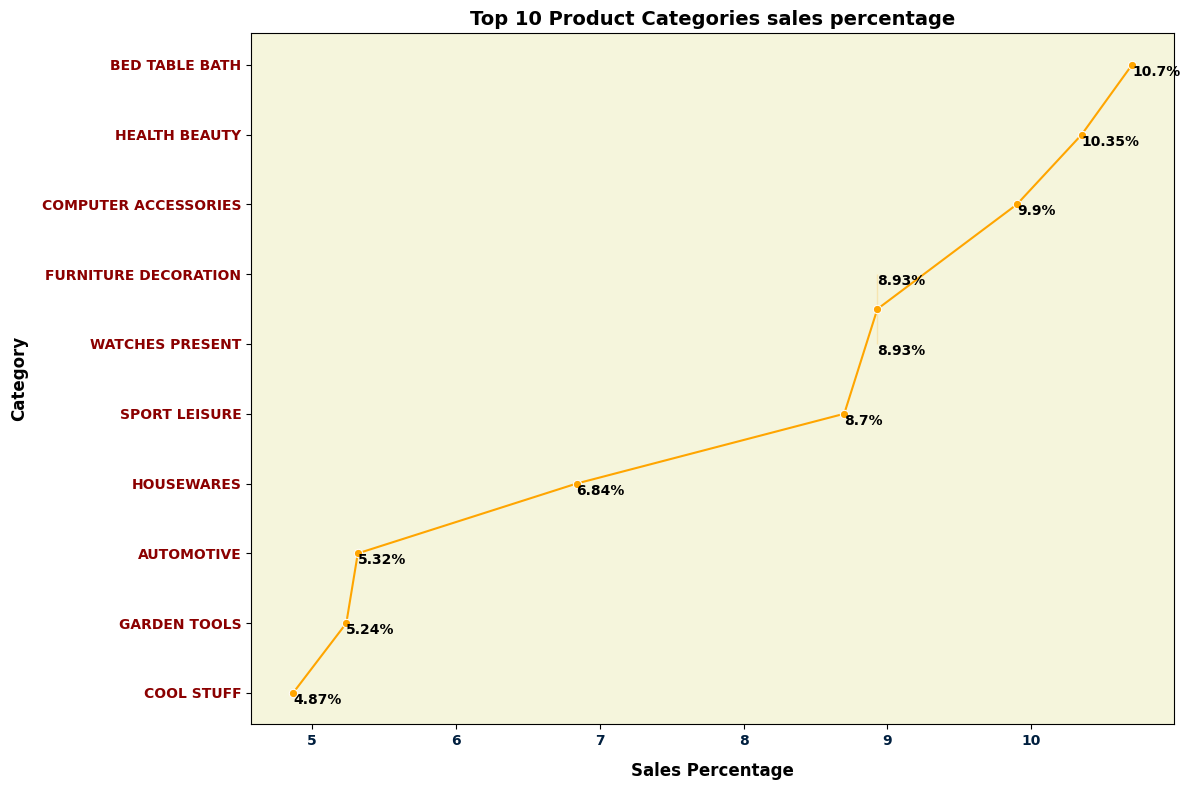

In [11]:
query="""with a as(select upper(products.product_category) as Category, round(sum(payments.payment_value),2)as Sales from products join order_items on products.product_id=order_items.product_id
join payments on payments.order_id=order_items.order_id group by Category)
select category,round((sales)/(select sum(payment_value) from payments)*100,2) as 'sales%' from a group by category order by sales desc limit 10;
;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["Category","Sales Percentage"])
plt.figure(figsize=(12,8))
#data_label=sns.barplot(x=df["Sales Percentage"],y=df["Category"],data=df,color='orange')
sns.lineplot(x=df["Sales Percentage"],y=df["Category"],data=df,color='orange',marker='o')
# set background color
plt.gca().set_facecolor('#f5f5dc')
#Add Data Labels to the lineplot
for i, row in df.iterrows():
    plt.text(row["Sales Percentage"], row["Category"], f'{row["Sales Percentage"]}%', 
             color='black', 
             ha='left', 
             va='top', 
             fontsize=10,fontweight='bold')
plt.xlabel('Sales Percentage',fontsize=12,fontweight='bold',labelpad=10)
plt.ylabel('Category',fontsize=12,fontweight='bold',labelpad=10)
plt.xticks(fontsize=10,fontweight='bold',color='#001f3f')
plt.yticks(fontsize=10,fontweight='bold',color='#8B0000')
plt.title('Top 10 Product Categories sales percentage',fontsize=14,fontweight='bold',loc='center')
plt.tight_layout()
plt.show()

# 9.Identify the correlation between product price and the number of times a product has been purchased.

In [15]:
query="""select upper(products.product_category) as Category, count(order_items.product_id),
round(avg(order_items.price),2)from products join order_items on products.product_id=order_items.product_id
group by Category;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["Category","Number of times product ordered","Average Price"])
arr1 = df["Number of times product ordered"]
arr2 = df["Average Price"]
a = np.corrcoef([arr1,arr2])
print("The correlation product order and price is\n\n",a)


The correlation product order and price is

 [[ 1.         -0.10631514]
 [-0.10631514  1.        ]]


# 10.Calculate the total revenue generated by each seller, and rank them by revenue.

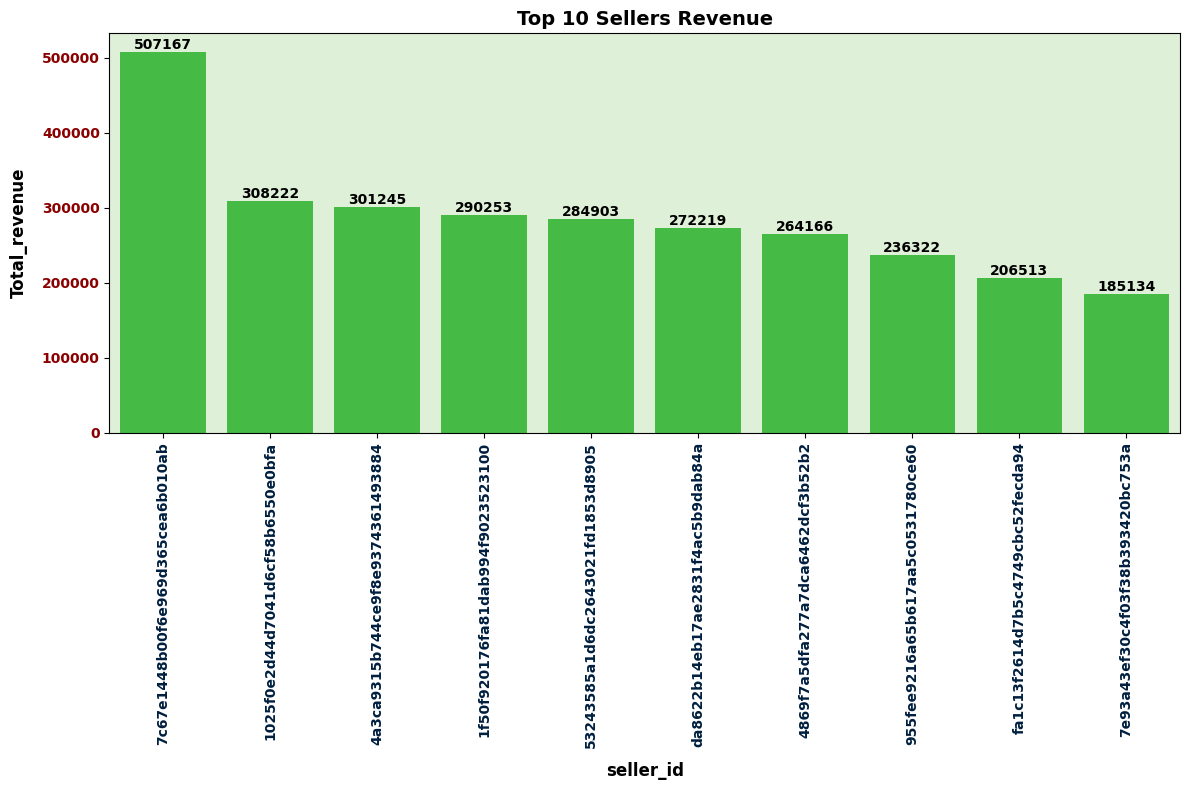

In [48]:
query="""with a as(select order_items.seller_id, round(sum(payments.payment_value),2)as Total_revenue from order_items 
join payments on order_items.order_id=payments.order_id group by order_items.seller_id order by Total_revenue desc limit 10)
select a.seller_id,a.Total_revenue ,dense_rank() over(order by Total_revenue desc) as 'Rank'from a;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["seller_id","Total_revenue","Rank"])
plt.figure(figsize=(12,8))
plt.gca().set_facecolor('#DFF0D8')
data_label=sns.barplot(x ="seller_id", y = "Total_revenue", data = df,color='#32CD32')
data_label.bar_label(data_label.containers[0],fontweight='bold')
plt.xlabel('seller_id',fontsize=12,fontweight='bold',labelpad=10)
plt.ylabel('Total_revenue',fontsize=12,fontweight='bold',labelpad=10)
plt.xticks(rotation = 90,fontsize=10,fontweight='bold',color='#001f3f')
plt.yticks(fontsize=10,fontweight='bold',color='#8B0000')
plt.title('Top 10 Sellers Revenue',fontsize=14,fontweight='bold',loc='center')
plt.tight_layout()
plt.show()

# 11.Calculate the moving average of order values for each customer over their order history.

In [28]:
query="""with a as(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment from payments join orders on payments.order_id=orders.order_id)
select customer_id,order_purchase_timestamp,payment,round(avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row),2) as moving_average from a;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["customer_id","order_purchase_timestamp","payment","moving_average"])
df


,customer_id,order_purchase_timestamp,payment,moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


# 12.Calculate the cumulative sales per month for each year.

In [21]:
query="""select years,months,payment,round(sum(payment) over(order by years,months),2) as Cumulative_sales from
(select year(order_purchase_timestamp) as years,month(order_purchase_timestamp)as months,round(sum(payments.payment_value),2) as payment from orders join payments 
on orders.order_id=payments.order_id group by years,months)as c;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["years","months","payment","Cumulative_sales"])
df

,years,months,payment,Cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# 13.Calculate the year-over-year growth rate of total sales.

In [15]:
query="""with d as(select year(order_purchase_timestamp) as years,round(sum(payments.payment_value),2) as payment from orders join payments 
on orders.order_id=payments.order_id group by years order by years)
select years,round(((payment-lag(payment,1)over(order by years))/ lag(payment,1)over(order by years))*100,2) as 'yoy%growth'from d;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["years","yoy%growth"])
df

,years,yoy%growth
0,2016,NaN
1,2017,12112.7
2,2018,20.0


# 14.Identify the top 3 customers who spent the most money in each year.

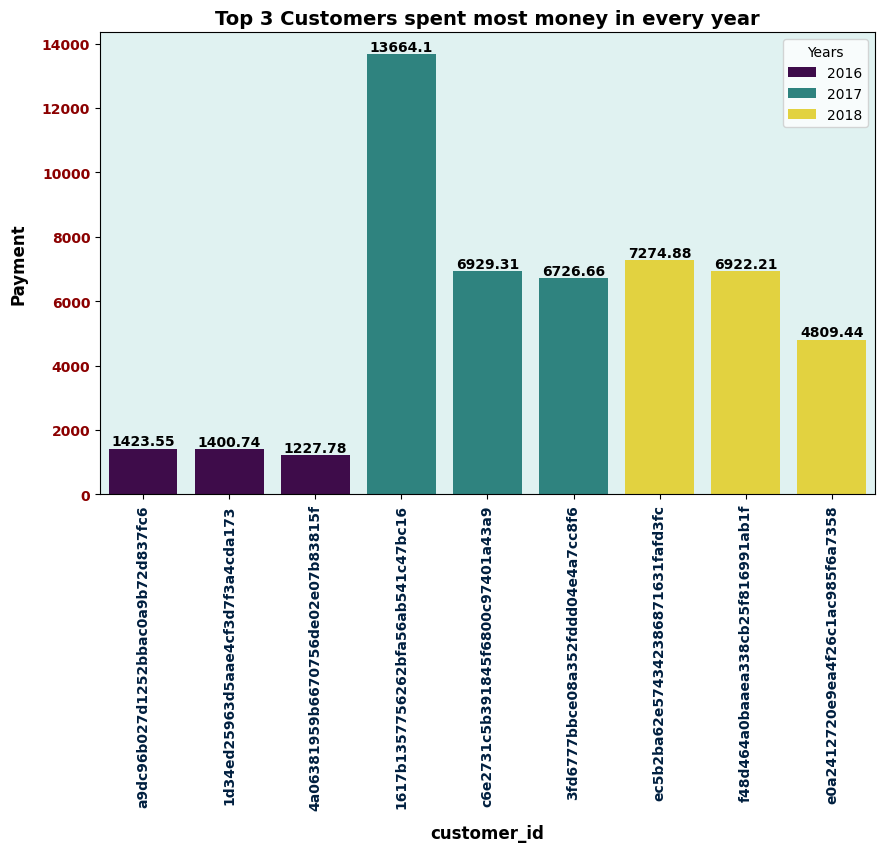

In [56]:
query="""select Years, customer_id,Payment,D_Rank from
(select year(orders.order_purchase_timestamp) as Years,orders.customer_id ,round(sum(payments.payment_value),2) as Payment,dense_rank() 
over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as D_Rank
from orders join payments on payments.order_id=orders.order_id group by year(orders.order_purchase_timestamp),orders.customer_id) as g
where D_Rank<=3;
"""
cur.execute(query)
data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["Years","customer_id","Payment","D_Rank"])
plt.figure(figsize=(10,6))
plt.gca().set_facecolor('#E0F2F1')
data_label=sns.barplot(x = "customer_id", y = "Payment", data = df, hue = "Years",palette='viridis')
# Access the containers (each one corresponds to one hue level)
containers = data_label.containers

# Loop through each container to add bar labels
for container in containers:
    data_label.bar_label(container, label_type='edge', fontsize=10, fontweight='bold', color='black')

plt.xlabel('customer_id',fontsize=12,fontweight='bold',labelpad=10)
plt.ylabel('Payment',fontsize=12,fontweight='bold',labelpad=10)
plt.xticks(rotation = 90,fontsize=10,fontweight='bold',color='#001f3f')
plt.yticks(fontsize=10,fontweight='bold',color='#8B0000')
plt.title('Top 3 Customers spent most money in every year',fontsize=14,fontweight='bold',loc='center')
plt.show()